In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "piemonte"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,1,Piemonte,2,0,2,1,3,0,0,...,0.0,0.0,0.0,0.0,0.00,66.67,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,1,Piemonte,2,0,2,1,3,0,0,...,0.0,15.0,0.0,0.0,0.00,66.67,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,1,Piemonte,2,0,2,0,2,-1,-1,...,0.0,0.0,0.0,-1.0,0.00,100.00,-inf,0.00,0.00,-33.33
3,2020-02-28T18:00:00,1,Piemonte,7,0,7,4,11,9,9,...,0.0,71.0,0.0,4.0,0.00,63.64,12.68,0.00,0.00,450.00
4,2020-02-29T17:00:00,1,Piemonte,7,0,7,4,11,0,0,...,0.0,81.0,0.0,0.0,0.00,63.64,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,2020-12-06T17:00:00,1,Piemonte,4239,359,4598,61440,66038,-725,1269,...,55.0,9386.0,3953.0,-681.0,7.81,6.96,13.52,32.10,-1.91,-1.09
286,2020-12-07T17:00:00,1,Piemonte,4243,345,4588,61161,65749,-289,911,...,64.0,10752.0,3595.0,-279.0,7.52,6.98,8.47,25.34,-3.90,-0.44
287,2020-12-08T17:00:00,1,Piemonte,4124,330,4454,60059,64513,-1236,952,...,59.0,11514.0,4342.0,-1102.0,7.41,6.90,8.27,21.93,-4.35,-1.88
288,2020-12-09T17:00:00,1,Piemonte,4102,318,4420,59063,63483,-1030,906,...,67.0,10579.0,4153.0,-996.0,7.19,6.96,8.56,21.82,-3.64,-1.60


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 10, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 974
Nuovi tamponi: 14418.0
Percentuale nuovi positivi/nuovi tamponi: 6.800000000000001 %
Nuovi guariti: 3266.0
Nuovi deceduti: 84.0
Variazione positivi ricoverati con sintomi: -33.0
Variazione positivi in terapia intensiva: -8.0
Variazione positivi in isolamento dimiciliare: -2335.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 10, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-11T17:00:00,1,Piemonte,378,24,402,4654,5056,315,409,...,3.0,6480.0,5001.0,289.0,5.97,7.95,6.31,8.18,9.09,6.64
1,2020-10-12T17:00:00,1,Piemonte,457,22,479,4984,5463,407,454,...,3.0,6386.0,4541.0,330.0,4.59,8.77,7.11,10.00,-8.33,8.05
2,2020-10-13T17:00:00,1,Piemonte,483,30,513,5452,5965,502,585,...,3.0,9182.0,3364.0,468.0,5.85,8.60,6.37,17.39,36.36,9.19
3,2020-10-14T17:00:00,1,Piemonte,562,33,595,5792,6387,422,499,...,4.0,5967.0,1977.0,340.0,5.55,9.32,8.36,25.24,10.00,7.07
4,2020-10-15T17:00:00,1,Piemonte,595,40,635,6673,7308,921,1033,...,3.0,14142.0,7607.0,881.0,6.30,8.69,7.30,13.58,21.21,14.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-06T17:00:00,1,Piemonte,4239,359,4598,61440,66038,-725,1269,...,55.0,9386.0,3953.0,-681.0,7.81,6.96,13.52,32.10,-1.91,-1.09
57,2020-12-07T17:00:00,1,Piemonte,4243,345,4588,61161,65749,-289,911,...,64.0,10752.0,3595.0,-279.0,7.52,6.98,8.47,25.34,-3.90,-0.44
58,2020-12-08T17:00:00,1,Piemonte,4124,330,4454,60059,64513,-1236,952,...,59.0,11514.0,4342.0,-1102.0,7.41,6.90,8.27,21.93,-4.35,-1.88
59,2020-12-09T17:00:00,1,Piemonte,4102,318,4420,59063,63483,-1030,906,...,67.0,10579.0,4153.0,-996.0,7.19,6.96,8.56,21.82,-3.64,-1.60


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

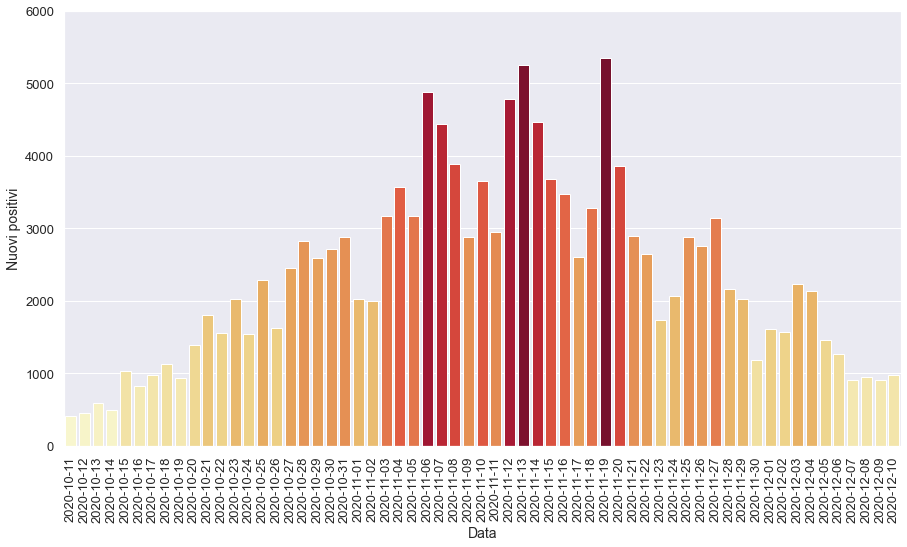

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

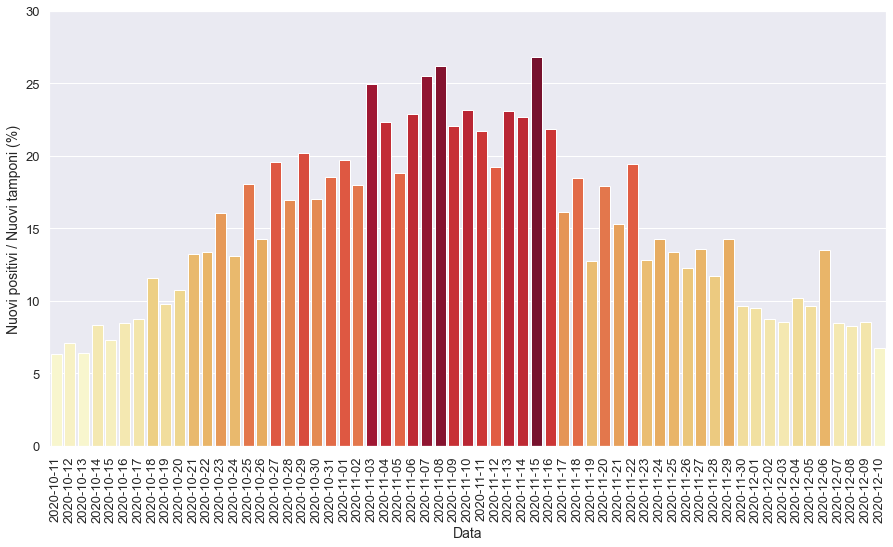

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

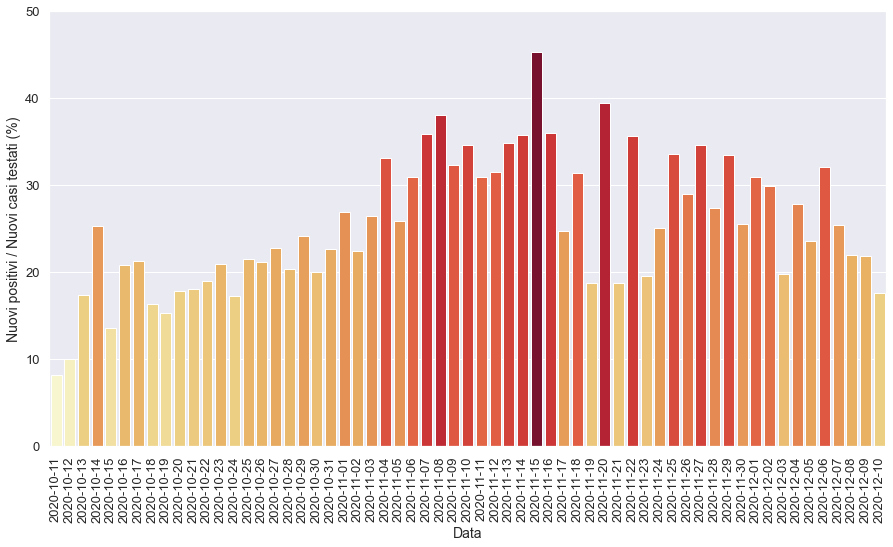

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

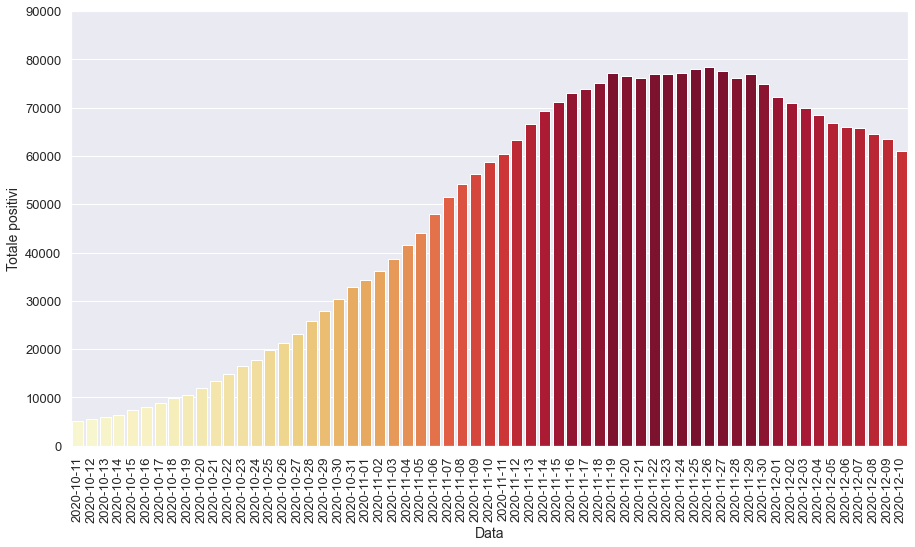

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

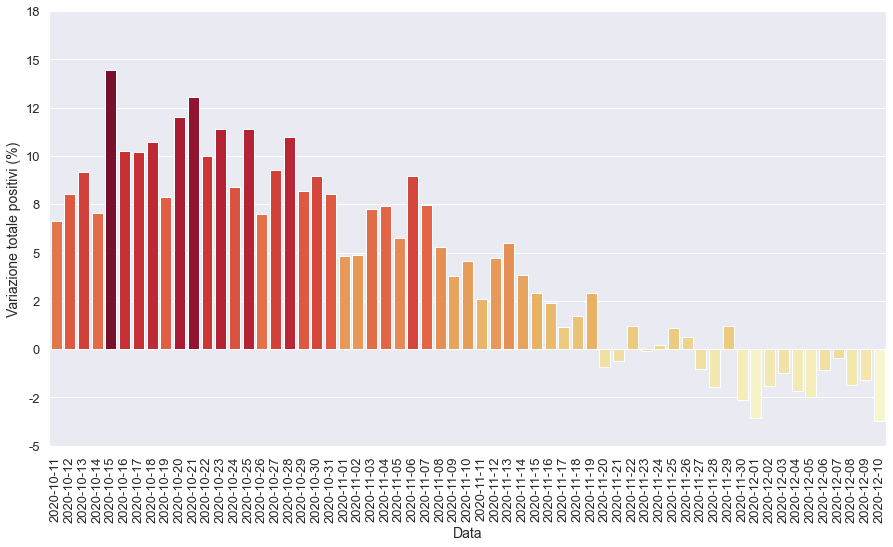

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

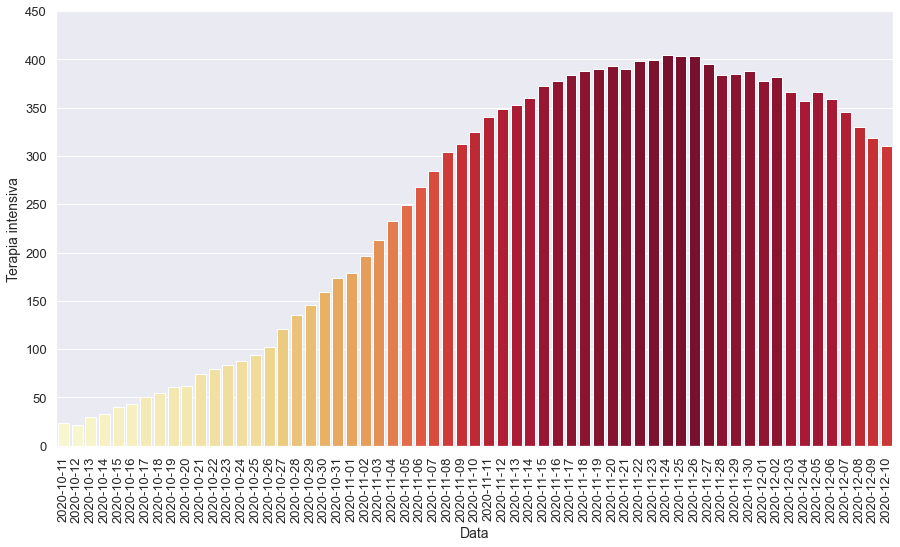

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

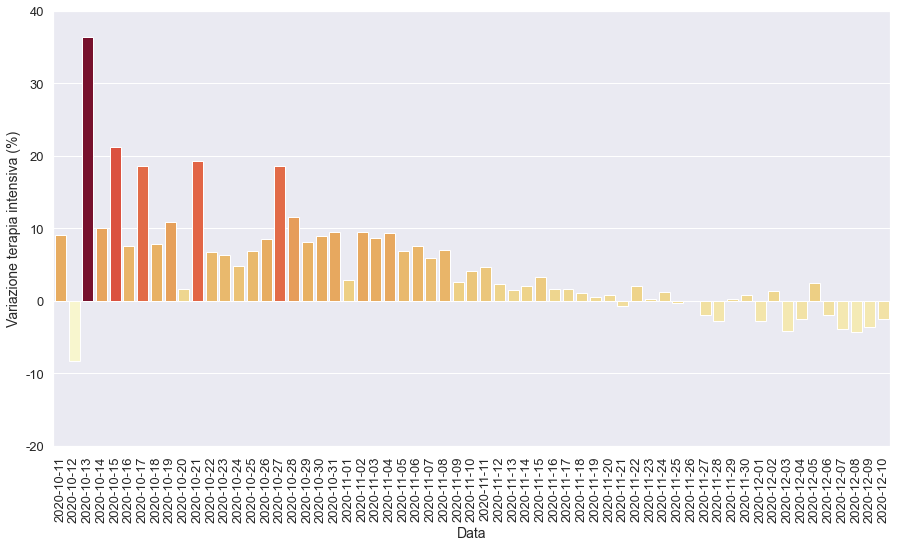

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

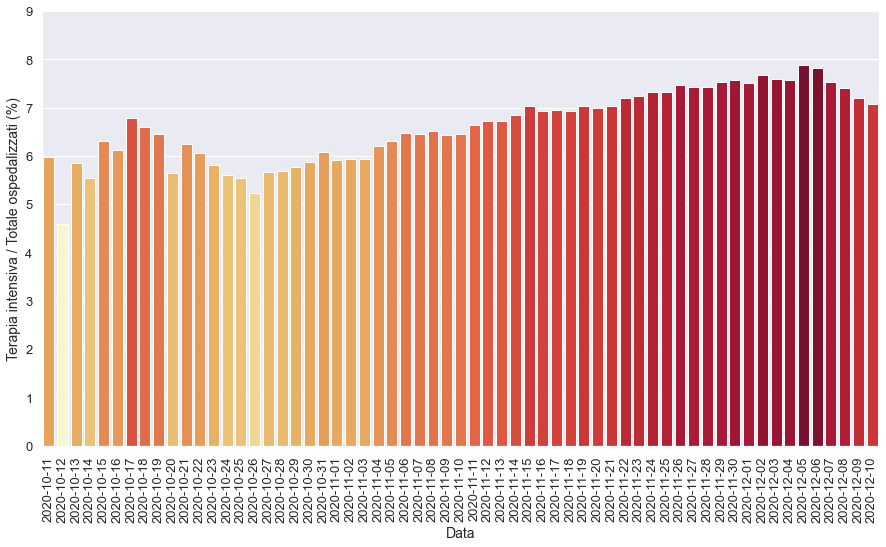

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

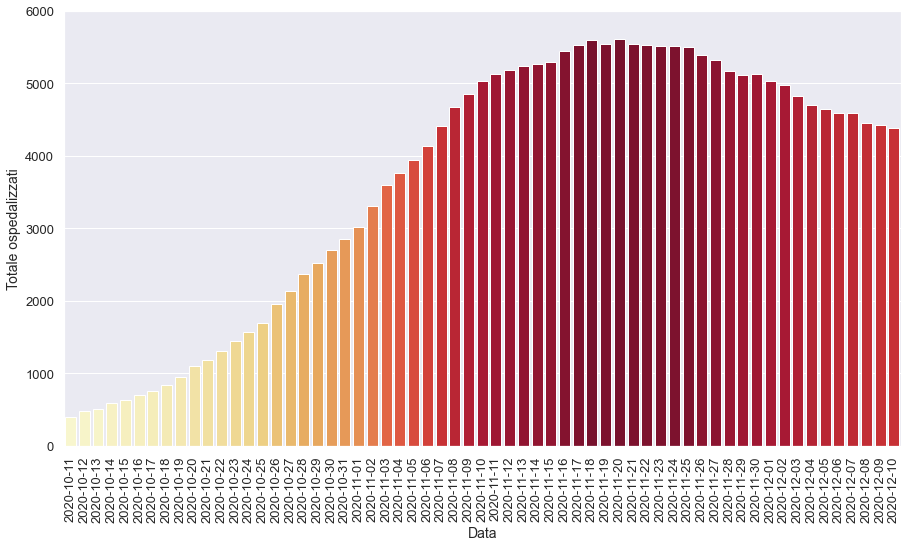

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

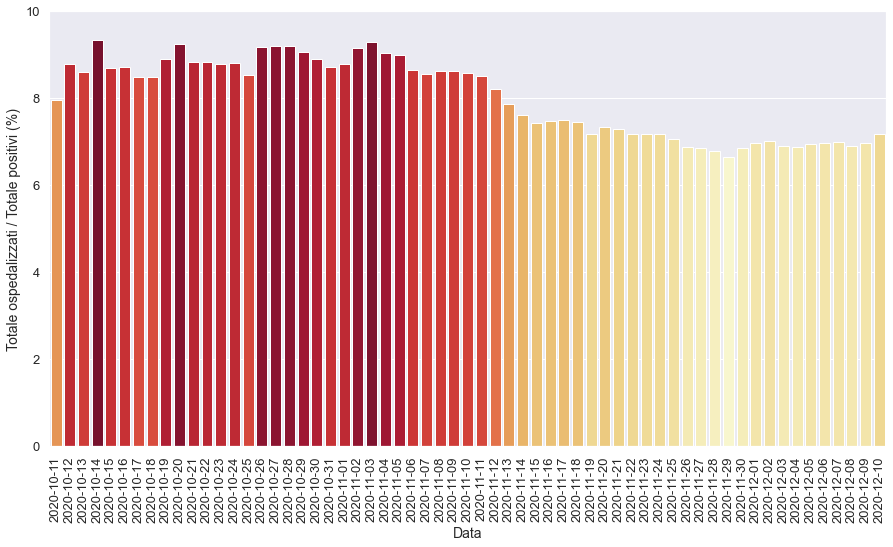

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

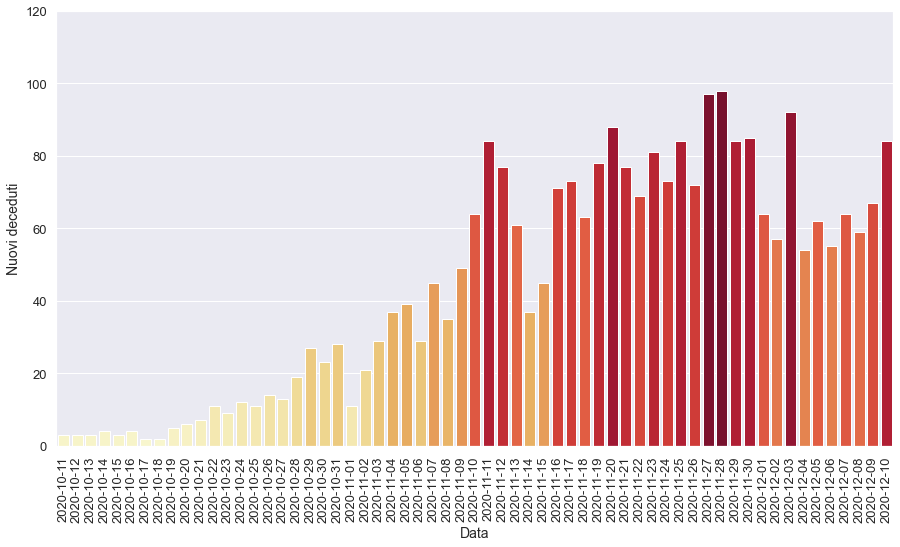

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

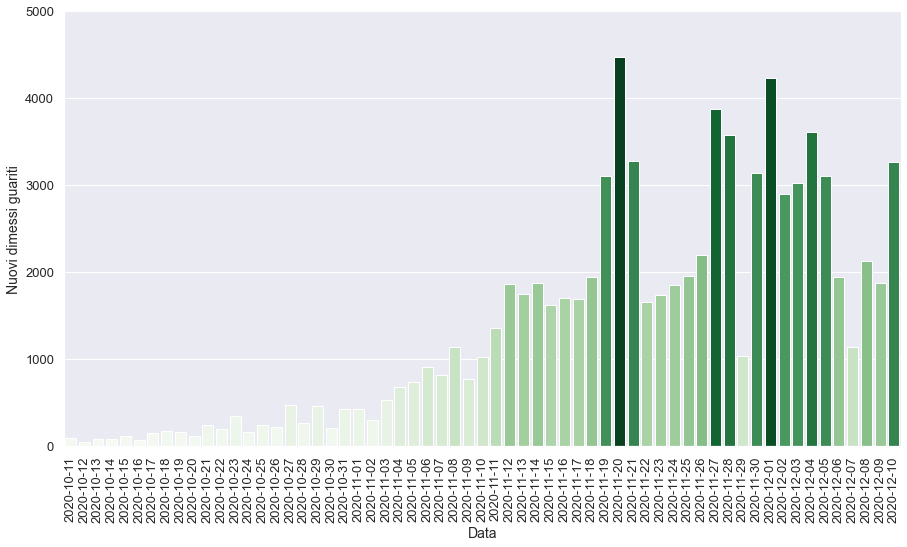

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-10T17:00:00,1,Piemonte,4715,325,5040,53795,58835,2579,3659,...,64.0,15812.0,10597.0,2391.0,6.45,8.57,23.14,34.53,4.17,4.58
1,2020-11-11T17:00:00,1,Piemonte,4790,340,5130,55224,60354,1519,2953,...,84.0,13578.0,9553.0,1429.0,6.63,8.50,21.75,30.91,4.62,2.58
2,2020-11-12T17:00:00,1,Piemonte,4833,348,5181,58017,63198,2844,4787,...,77.0,24901.0,15216.0,2793.0,6.72,8.20,19.22,31.46,2.35,4.71
3,2020-11-13T17:00:00,1,Piemonte,4890,353,5243,61411,66654,3456,5258,...,61.0,22778.0,15083.0,3394.0,6.73,7.87,23.08,34.86,1.44,5.47
4,2020-11-14T17:00:00,1,Piemonte,4902,360,5262,63953,69215,2561,4471,...,37.0,19715.0,12523.0,2542.0,6.84,7.60,22.68,35.70,1.98,3.84
5,2020-11-15T17:00:00,1,Piemonte,4921,372,5293,65936,71229,2014,3682,...,45.0,13712.0,8127.0,1983.0,7.03,7.43,26.85,45.31,3.33,2.91
6,2020-11-16T17:00:00,1,Piemonte,5074,378,5452,67488,72940,1711,3476,...,71.0,15902.0,9654.0,1552.0,6.93,7.47,21.86,36.01,1.61,2.40
7,2020-11-17T17:00:00,1,Piemonte,5150,384,5534,68252,73786,846,2606,...,73.0,16131.0,10574.0,764.0,6.94,7.50,16.16,24.65,1.59,1.16
8,2020-11-18T17:00:00,1,Piemonte,5208,388,5596,69468,75064,1278,3281,...,63.0,17755.0,10445.0,1216.0,6.93,7.45,18.48,31.41,1.04,1.73
9,2020-11-19T17:00:00,1,Piemonte,5147,390,5537,71700,77237,2173,5349,...,78.0,41876.0,28547.0,2232.0,7.04,7.17,12.77,18.74,0.52,2.89


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

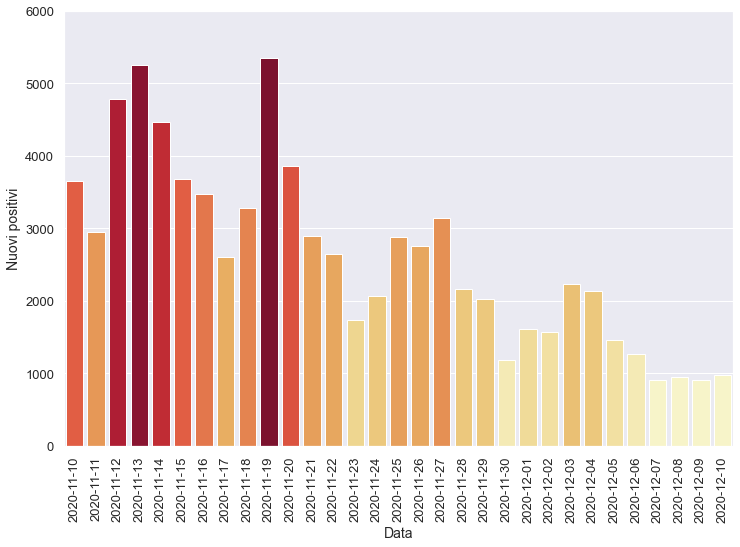

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

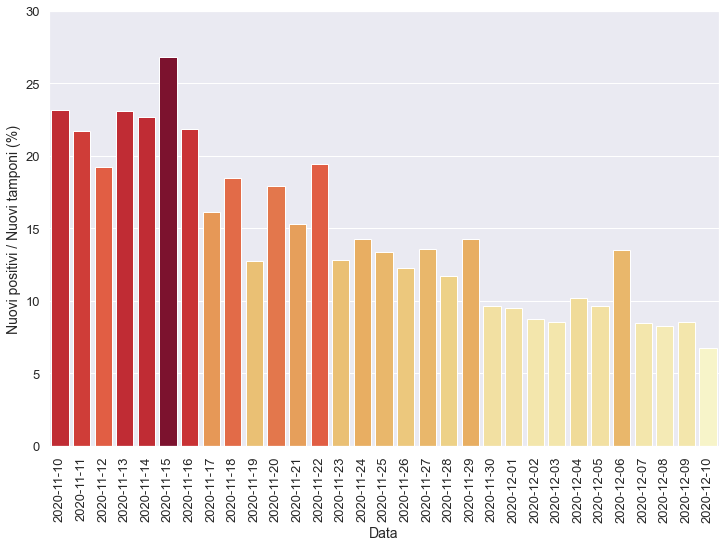

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

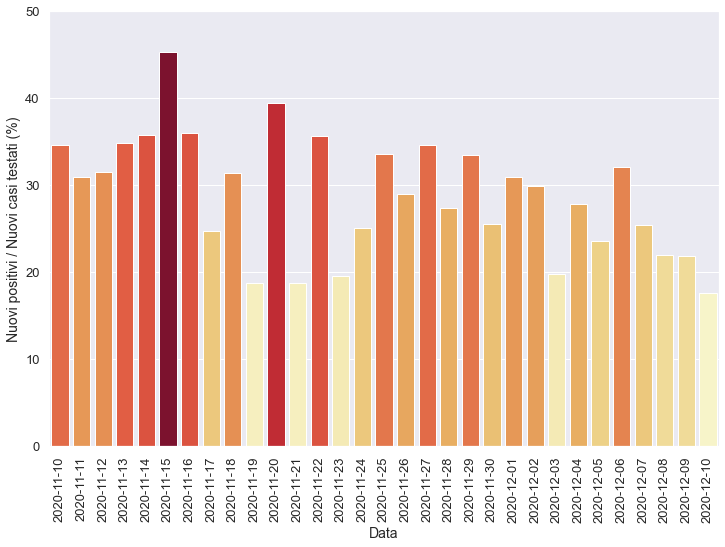

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

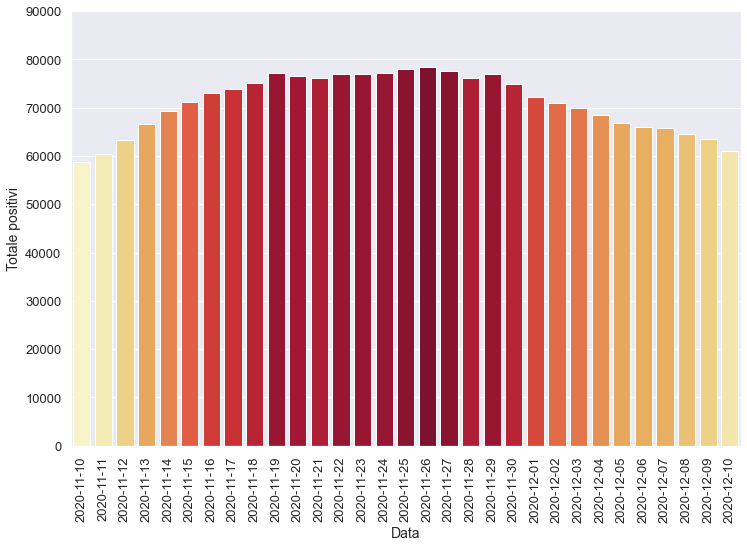

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

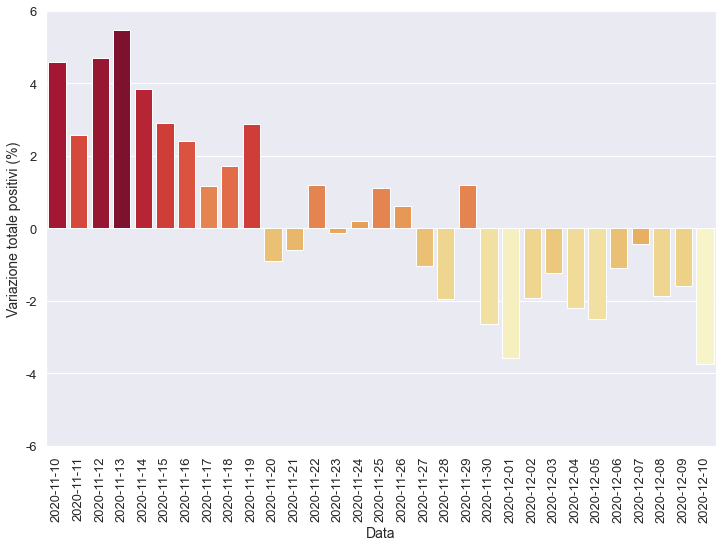

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

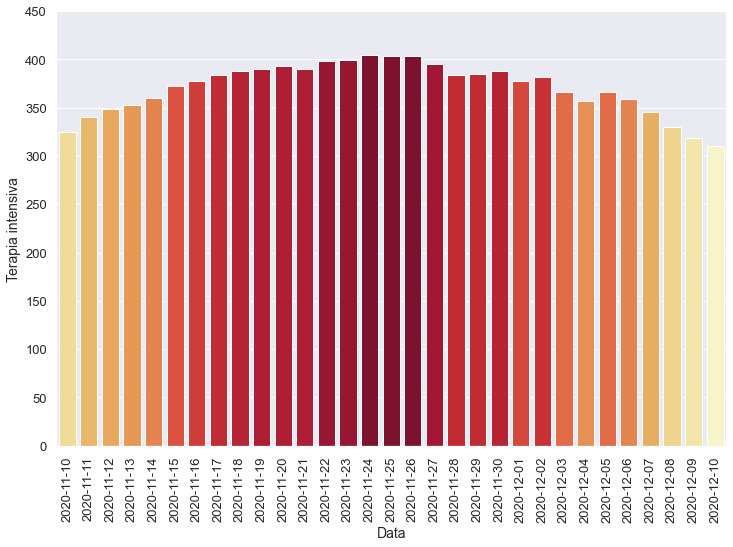

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

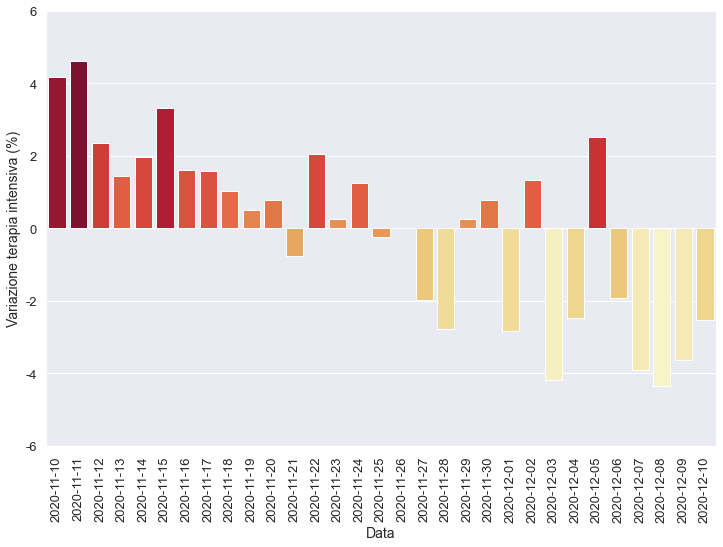

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

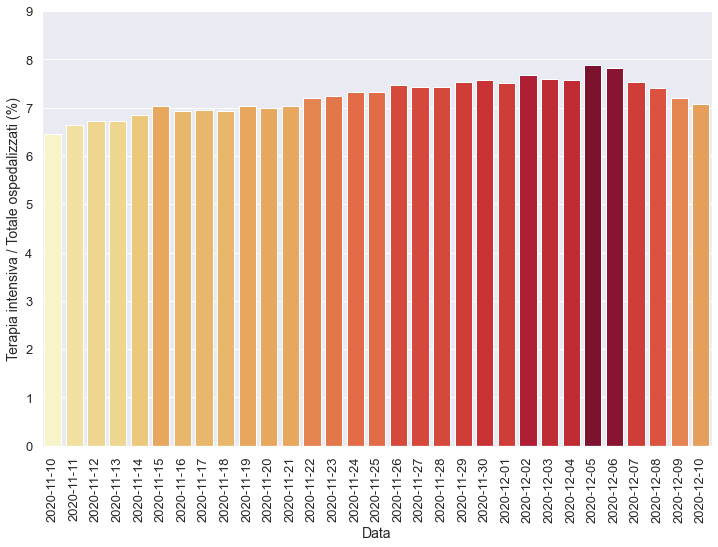

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

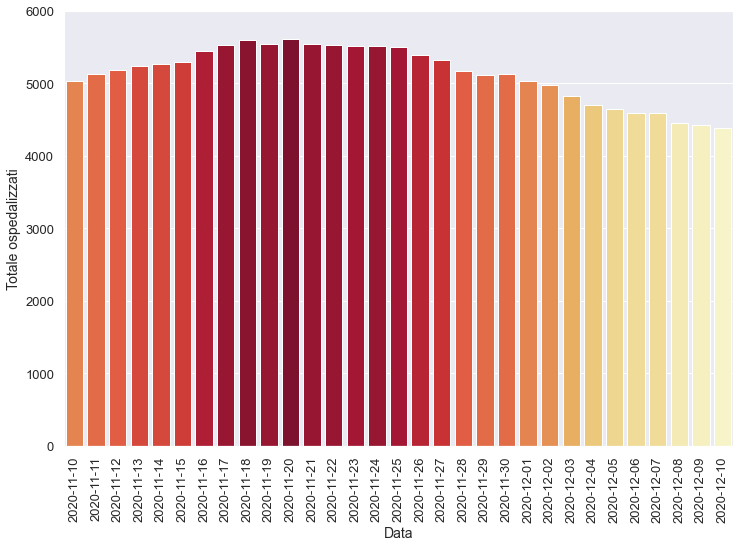

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

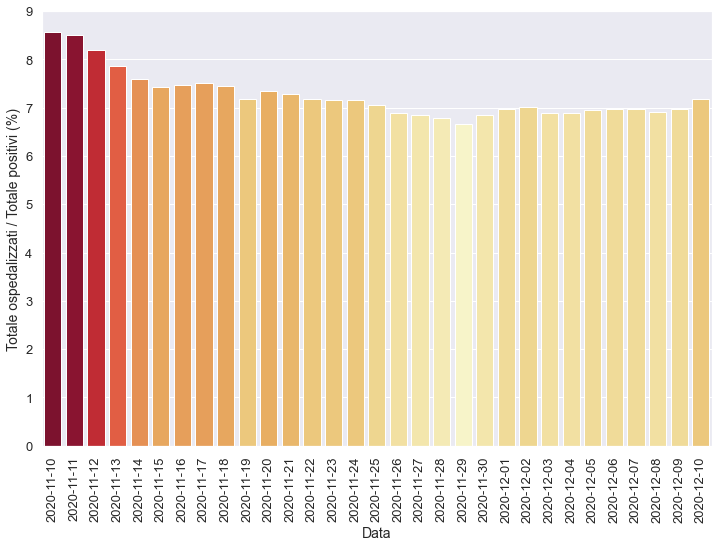

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

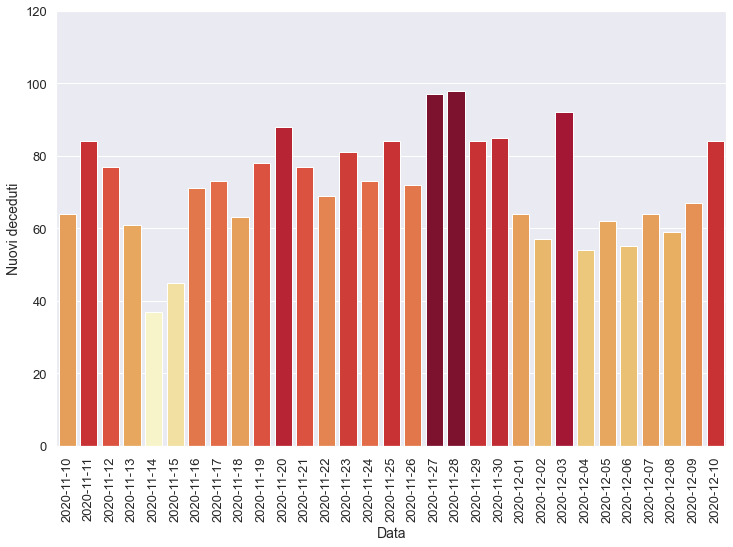

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

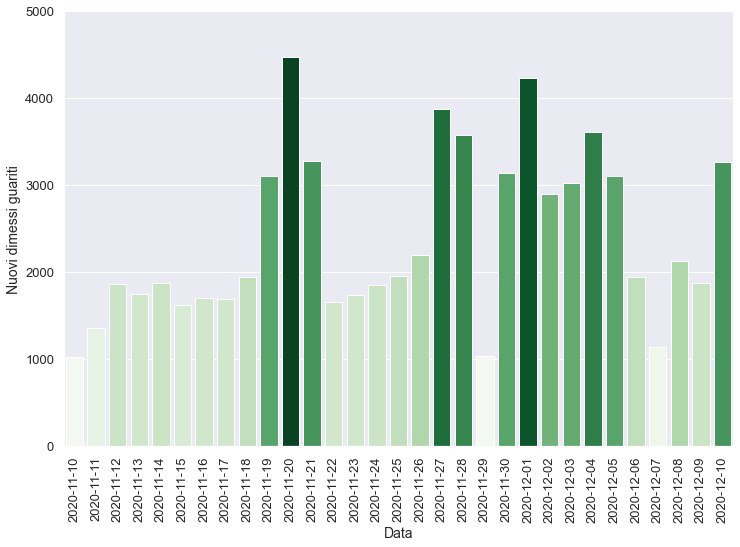

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-03T17:00:00,1,Piemonte,4459,366,4825,65181,70006,-881,2230,...,92.0,26163.0,11290.0,-728.0,7.59,6.89,8.52,19.75,-4.19,-1.24
1,2020-12-04T17:00:00,1,Piemonte,4351,357,4708,63768,68476,-1530,2132,...,54.0,20846.0,7663.0,-1413.0,7.58,6.88,10.23,27.82,-2.46,-2.19
2,2020-12-05T17:00:00,1,Piemonte,4276,366,4642,62121,66763,-1713,1456,...,62.0,15100.0,6179.0,-1647.0,7.88,6.95,9.64,23.56,2.52,-2.50
3,2020-12-06T17:00:00,1,Piemonte,4239,359,4598,61440,66038,-725,1269,...,55.0,9386.0,3953.0,-681.0,7.81,6.96,13.52,32.10,-1.91,-1.09
4,2020-12-07T17:00:00,1,Piemonte,4243,345,4588,61161,65749,-289,911,...,64.0,10752.0,3595.0,-279.0,7.52,6.98,8.47,25.34,-3.90,-0.44
5,2020-12-08T17:00:00,1,Piemonte,4124,330,4454,60059,64513,-1236,952,...,59.0,11514.0,4342.0,-1102.0,7.41,6.90,8.27,21.93,-4.35,-1.88
6,2020-12-09T17:00:00,1,Piemonte,4102,318,4420,59063,63483,-1030,906,...,67.0,10579.0,4153.0,-996.0,7.19,6.96,8.56,21.82,-3.64,-1.60
7,2020-12-10T17:00:00,1,Piemonte,4069,310,4379,56728,61107,-2376,974,...,84.0,14418.0,5560.0,-2335.0,7.08,7.17,6.76,17.52,-2.52,-3.74


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

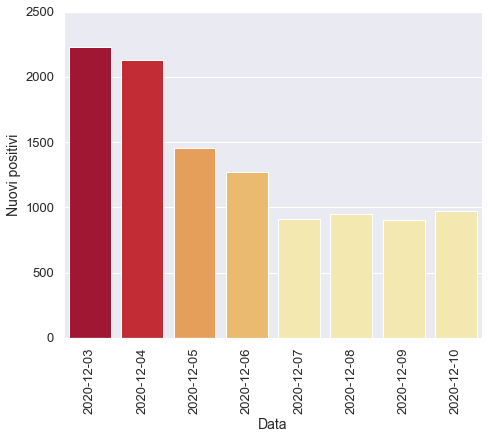

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

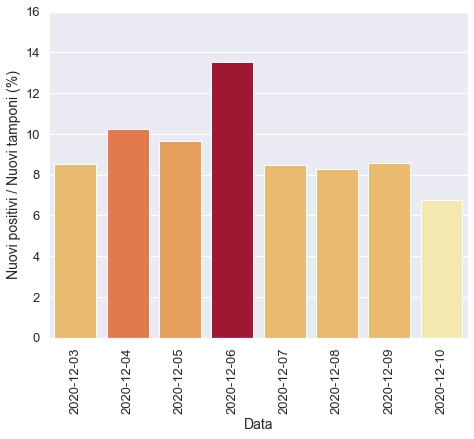

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

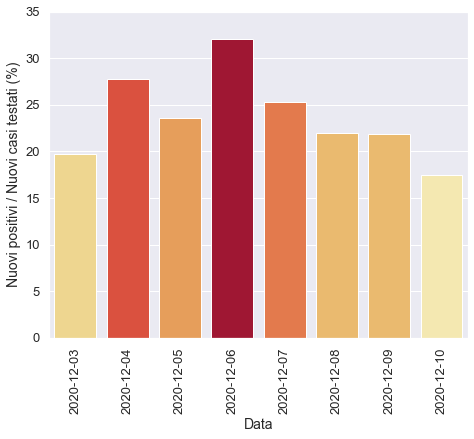

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

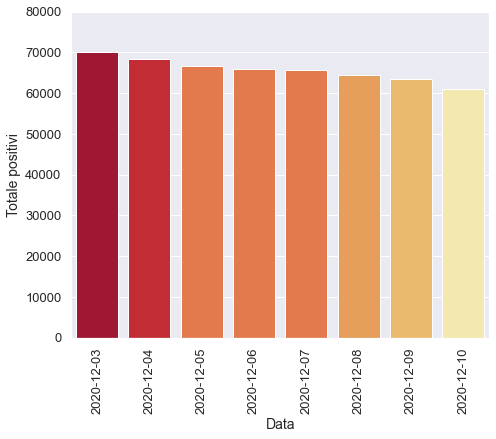

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

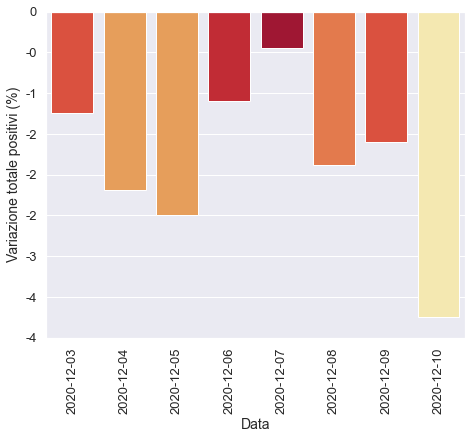

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

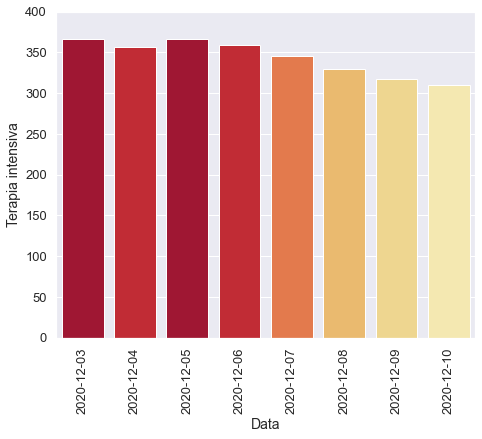

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

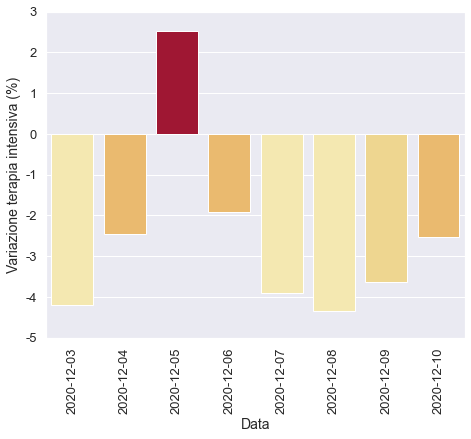

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

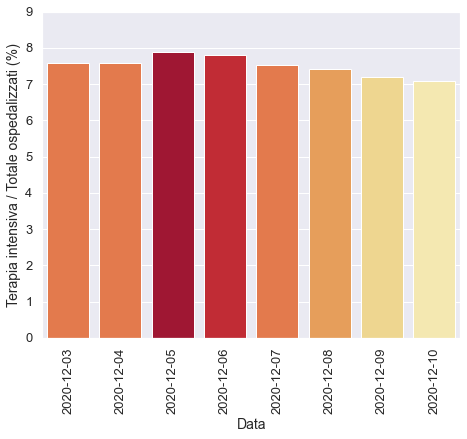

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

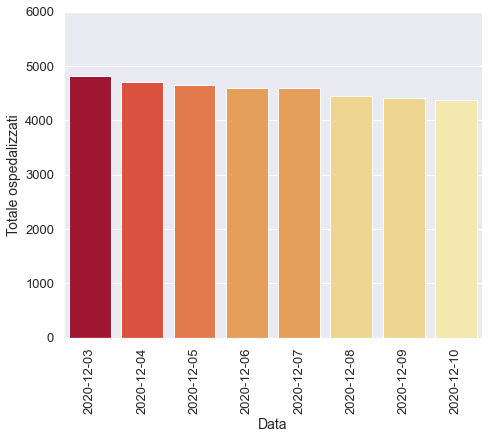

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

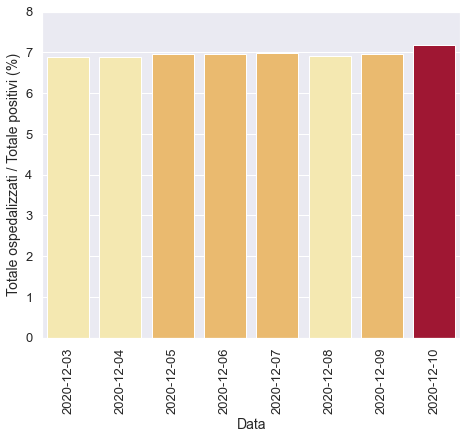

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

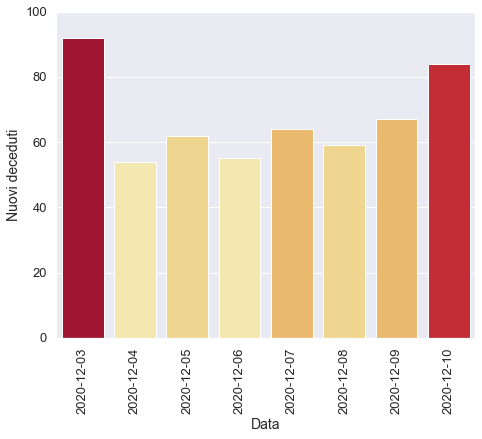

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

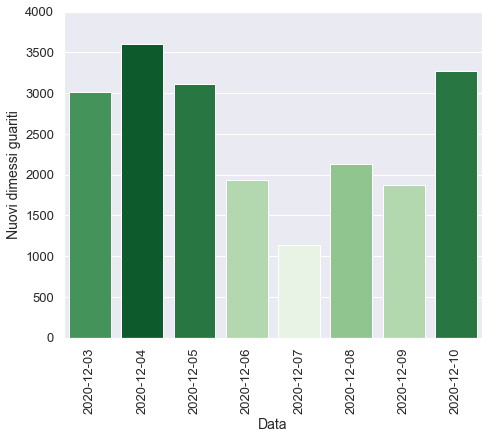

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)